In [5]:
# keras 기반의 회귀분석 예제
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import font_manager, rc
import tensorflow.keras
from tensorflow.keras.models import Sequential
from keras.layers.core import Dense #?
from tensorflow.keras.optimizers import RMSprop

#한글처리
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [6]:
np.random.seed(7)

data = np.genfromtxt('c:/data/regression/x09.txt', skip_header=36)
data[:10]

array([[  1.,   1.,  84.,  46., 354.],
       [  2.,   1.,  73.,  20., 190.],
       [  3.,   1.,  65.,  52., 405.],
       [  4.,   1.,  70.,  30., 263.],
       [  5.,   1.,  76.,  57., 451.],
       [  6.,   1.,  69.,  25., 302.],
       [  7.,   1.,  63.,  28., 288.],
       [  8.,   1.,  72.,  36., 385.],
       [  9.,   1.,  79.,  57., 402.],
       [ 10.,   1.,  75.,  44., 365.]])

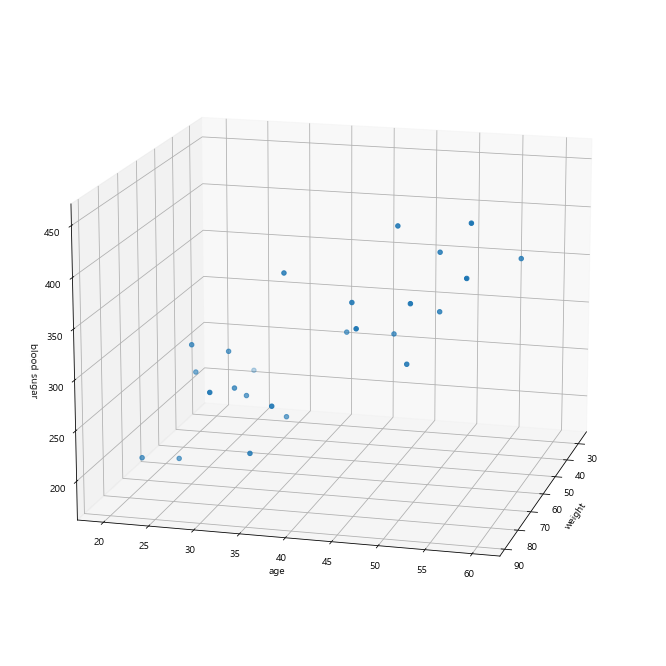

In [7]:
from mpl_toolkits.mplot3d import Axes3D

xdata = np.array(data[:,2], dtype=np.float32)
ydata = np.array(data[:,3], dtype=np.float32)
zdata = np.array(data[:,4], dtype=np.float32)
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xdata, ydata, zdata)
ax.set_xlabel('weight')
ax.set_ylabel('age')
ax.set_zlabel('blood sugar')
ax.view_init(15,15)
plt.show()

In [9]:
#데이터를 케라스에 맞게 변환
#독립변수
x_data = np.array(data[:, 2:4], dtype=np.float32)
#종속변수
y_data = np.array(data[:,4], dtype=np.float32)
#회귀분석 모델 생성
model = Sequential()
model.add(Dense(1, input_shape=(2,)))

rmsprop=RMSprop(learning_rate=0.01) #학습률 0.01
model.compile(loss='mse', optimizer=rmsprop)

In [10]:
hist = model.fit(x_data, y_data, epochs=1000) #epochs 학습횟수

Epoch 1/1000
1/1 [==============================] - 1s 1s/step - loss: 106891.3672
Epoch 2/1000
1/1 [==============================] - 0s 3ms/step - loss: 104646.0234
Epoch 3/1000
1/1 [==============================] - 0s 2ms/step - loss: 103040.6406
Epoch 4/1000
1/1 [==============================] - 0s 6ms/step - loss: 101710.3672
Epoch 5/1000
1/1 [==============================] - 0s 3ms/step - loss: 100539.6562
Epoch 6/1000
1/1 [==============================] - 0s 3ms/step - loss: 99474.9766
Epoch 7/1000
1/1 [==============================] - 0s 3ms/step - loss: 98486.5391
Epoch 8/1000
1/1 [==============================] - 0s 3ms/step - loss: 97555.8281
Epoch 9/1000
1/1 [==============================] - 0s 3ms/step - loss: 96670.4922
Epoch 10/1000
1/1 [==============================] - 0s 2ms/step - loss: 95821.7422
Epoch 11/1000
1/1 [==============================] - 0s 3ms/step - loss: 95003.2031
Epoch 12/1000
1/1 [==============================] - 0s 5ms/step - loss: 94210.00

In [11]:
print(hist.history.keys())

dict_keys(['loss'])


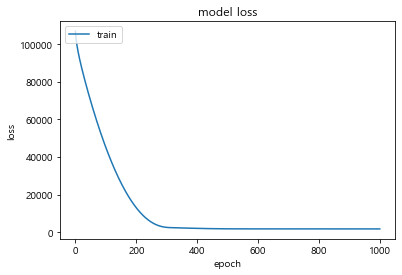

In [13]:
plt.plot(hist.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [14]:
# 새로운 데이터
model.predict(np.array([100,40]).reshape(1,2))

array([[351.9284]], dtype=float32)

In [15]:
model.predict(np.array([60,25]).reshape(1,2))

array([[220.45203]], dtype=float32)

In [16]:
w, b = model.get_weights()
w, b

(array([[1.2042965],
        [5.5536337]], dtype=float32),
 array([9.3534], dtype=float32))

In [17]:
x = np.linspace(20, 100, 50).reshape(50, 1)
y = np.linspace(10, 70, 50).reshape(50, 1)
x2 = np.concatenate((x,y), axis=1)

z = np.matmul(x2, w) + b

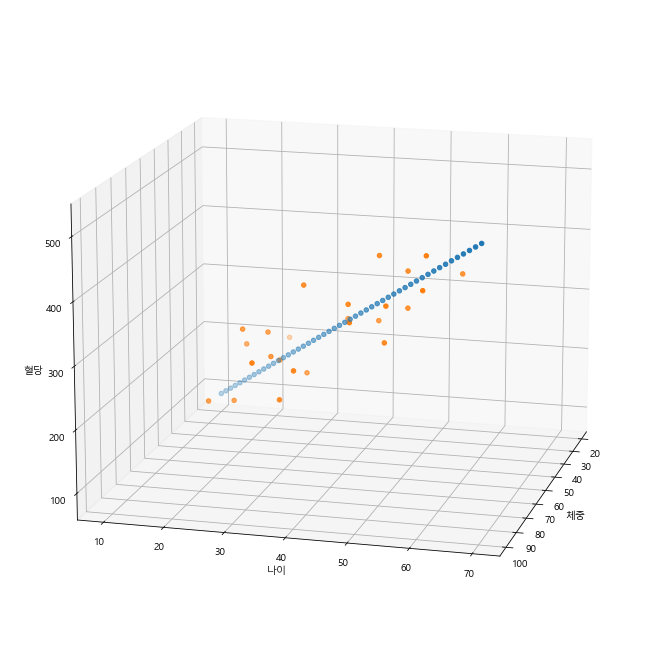

In [19]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')
#회귀선
ax.scatter(x,y,z)
#산점도
ax.scatter(xdata, ydata, zdata)
ax.set_xlabel('체중')
ax.set_ylabel('나이')
ax.set_zlabel('혈당')
ax.view_init(15,15)
plt.show()

In [1]:
#keras회귀분석(주택가격 데이터셋)
from tensorflow.python import keras

keras.__version__

'2.6.0'

In [2]:
#주택 가격 예측: 회귀분석

from tensorflow.keras.datasets import boston_housing
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

In [3]:
print(X_train.shape)
print(X_train.shape[1])

(404, 13)
13


In [4]:
X_test.shape

(102, 13)

In [5]:
#독립변수: 범죄율, 평수, 평균 방 개수, 고속도로 접근성 등등
#종속변수 : 주택의 가격(천달러 단위)

y_train[0:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

<AxesSubplot:>

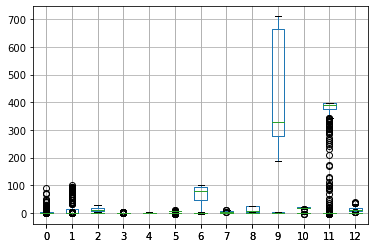

In [6]:
import pandas as pd
pd.DataFrame(X_train).boxplot()

from sklearn.preprocessing import StandardScaler
# 평균 0, 표준편차 1로 만드는 스케일러
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

pd.DataFrame(X_train_scaled).boxplot()

In [12]:
#활성화 함수 : 입력데이터를 적절하게 처리하여 출력데이터를 만들어 내는 함수
# 탄젠트 함수, 시그모이드 함수, ReLU함수(학습시간이 빠름)

from tensorflow.keras import models
from tensorflow.keras import layers

def build_model():
    model = models.Sequential() #신경망 모형

    # 출력노드 64개, 활성함수 relu
    # .shape[1], >>> input이 1차원
    model.add(layers.Dense(64, activation='relu', input_shape = (X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    #mse : 평균 제곱 오차
    #mae : 평균 절대 오차
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    
    return model

In [13]:
model = build_model()

#모델 학습
hist = model.fit(X_train, y_train,
epochs=10, batch_size=1, verbose=1)

Epoch 1/10
404/404 [==============================] - 3s 4ms/step - loss: 141.6862 - mae: 8.9208
Epoch 2/10
404/404 [==============================] - 2s 4ms/step - loss: 97.7822 - mae: 7.2470
Epoch 3/10
404/404 [==============================] - 2s 4ms/step - loss: 80.9356 - mae: 6.6262
Epoch 4/10
404/404 [==============================] - 2s 4ms/step - loss: 69.7553 - mae: 6.1664
Epoch 5/10
404/404 [==============================] - 2s 5ms/step - loss: 62.7445 - mae: 5.7494
Epoch 6/10
404/404 [==============================] - 2s 5ms/step - loss: 58.2253 - mae: 5.4686
Epoch 7/10
404/404 [==============================] - 2s 4ms/step - loss: 50.8592 - mae: 5.2806
Epoch 8/10
404/404 [==============================] - 2s 4ms/step - loss: 47.0411 - mae: 4.9668
Epoch 9/10
404/404 [==============================] - 2s 5ms/step - loss: 48.3904 - mae: 4.9506
Epoch 10/10
404/404 [==============================] - 2s 4ms/step - loss: 43.6104 - mae: 4.7849


In [14]:
# 검증용 데이터로 모델 평가
mse, mae = model.evaluate(X_test, y_test, verbose=1)
print(mse)
print(mae)

4/4 [==============================] - 0s 3ms/step - loss: 33.6478 - mae: 4.0939
33.647796630859375
4.093933582305908


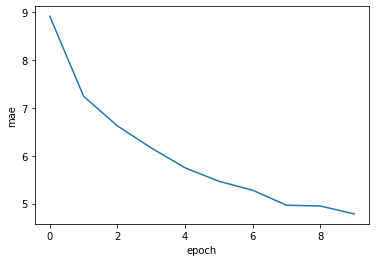

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(hist.history['mae'])
plt.ylabel('mae')
plt.xlabel('epoch')
plt.show()

In [16]:
model.summary() #모델의 레이어를 보는 코드

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________
